In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

## Read Data

In [124]:
def read_data(filename):
    return pd.read_csv(filename)

In [173]:
df = read_data('credit-data.csv')

In [174]:
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


## Explore Data

In [190]:
def info(df):
    return df.info(null_counts=True)

In [191]:
info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41016 entries, 0 to 41015
Data columns (total 13 columns):
PersonID                                41016 non-null int64
SeriousDlqin2yrs                        41016 non-null int64
RevolvingUtilizationOfUnsecuredLines    41016 non-null float64
age                                     41016 non-null int64
zipcode                                 41016 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    41016 non-null int64
DebtRatio                               41016 non-null float64
MonthlyIncome                           41016 non-null float64
NumberOfOpenCreditLinesAndLoans         41016 non-null int64
NumberOfTimes90DaysLate                 41016 non-null int64
NumberRealEstateLoansOrLines            41016 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    41016 non-null int64
NumberOfDependents                      41016 non-null float64
dtypes: float64(4), int64(9)
memory usage: 4.1 MB


In [175]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41016 entries, 0 to 41015
Data columns (total 13 columns):
PersonID                                41016 non-null int64
SeriousDlqin2yrs                        41016 non-null int64
RevolvingUtilizationOfUnsecuredLines    41016 non-null float64
age                                     41016 non-null int64
zipcode                                 41016 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    41016 non-null int64
DebtRatio                               41016 non-null float64
MonthlyIncome                           33042 non-null float64
NumberOfOpenCreditLinesAndLoans         41016 non-null int64
NumberOfTimes90DaysLate                 41016 non-null int64
NumberRealEstateLoansOrLines            41016 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    41016 non-null int64
NumberOfDependents                      39979 non-null float64
dtypes: float64(4), int64(9)
memory usage: 4.1 MB


In [188]:
def summ_stats(df):
    return df.describe()

In [189]:
summ_stats(df)

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.000000,41016.00000,41016.000000,41016.000000,41016.000000,41016.000000,4.101600e+04,41016.000000,41016.000000,41016.000000,41016.000000,41016.000000
mean,115800.154598,0.161400,6.37587,51.683489,60623.824166,0.589233,331.458137,6.320623e+03,8.403477,0.419592,1.008801,0.371587,0.753681
std,28112.723511,0.367904,221.61895,14.746880,11.984357,5.205628,1296.109695,1.208056e+04,5.207324,5.190382,1.153826,5.169641,1.113639
min,22.000000,0.000000,0.00000,21.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106539.750000,0.000000,0.03431,41.000000,60618.000000,0.000000,0.176375,3.800000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,119901.500000,0.000000,0.18973,51.000000,60625.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,134698.250000,0.000000,0.66716,62.000000,60629.000000,0.000000,0.866471,7.245500e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,22000.00000,109.000000,60644.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


In [185]:
# summary statistics for all columns 

df.describe()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.000000,41016.00000,41016.000000,41016.000000,41016.000000,41016.000000,4.101600e+04,41016.000000,41016.000000,41016.000000,41016.000000,41016.000000
mean,115800.154598,0.161400,6.37587,51.683489,60623.824166,0.589233,331.458137,6.320623e+03,8.403477,0.419592,1.008801,0.371587,0.753681
std,28112.723511,0.367904,221.61895,14.746880,11.984357,5.205628,1296.109695,1.208056e+04,5.207324,5.190382,1.153826,5.169641,1.113639
min,22.000000,0.000000,0.00000,21.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106539.750000,0.000000,0.03431,41.000000,60618.000000,0.000000,0.176375,3.800000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,119901.500000,0.000000,0.18973,51.000000,60625.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,134698.250000,0.000000,0.66716,62.000000,60629.000000,0.000000,0.866471,7.245500e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,22000.00000,109.000000,60644.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


In [192]:
def null_count(df):
    return df.isnull().sum()

In [193]:
null_count(df)

PersonID                                0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
zipcode                                 0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [129]:
# counting number of missing values in each column

df.isnull().sum()

PersonID                                   0
SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
zipcode                                    0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           7974
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1037
dtype: int64

In [196]:
def make_hist(df, width, height):
    df.hist(figsize=(width, height))

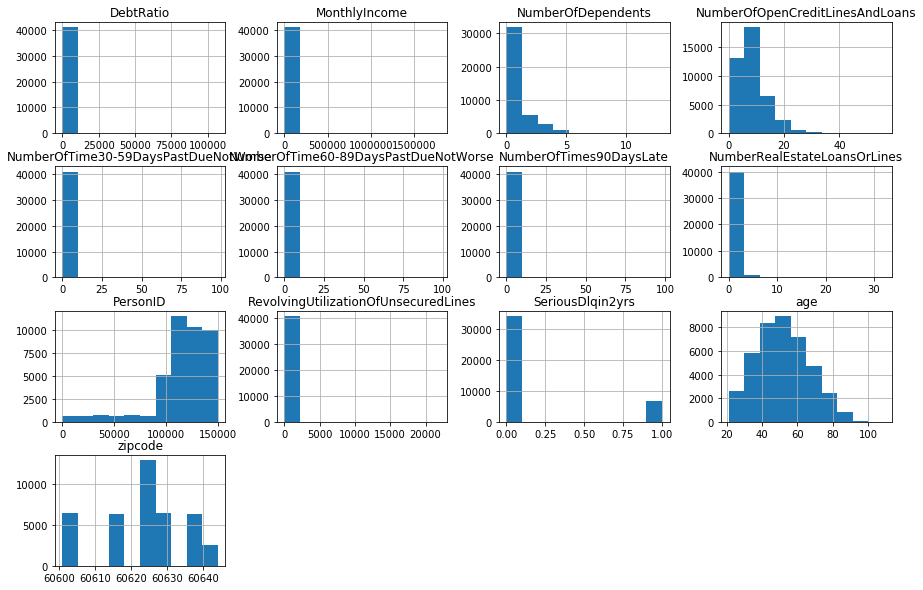

In [198]:
make_hist(df, 15, 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c45ae48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12c843710>]], dtype=object)

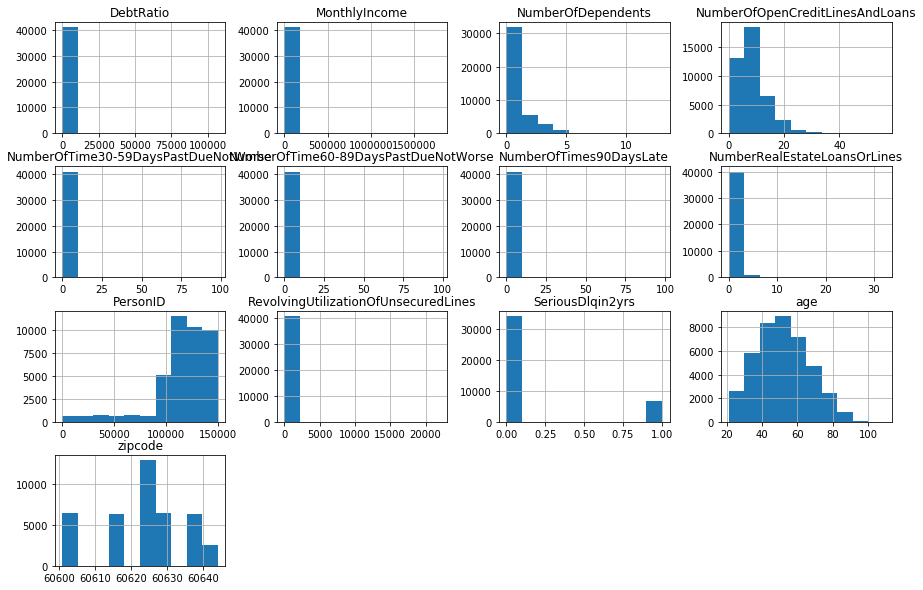

In [194]:
df.hist(figsize=(15, 10))

In [199]:
def corr_heatmap(df, width, height):
    corr = df.corr()
    png, ax = plt.subplots(figsize=(width, height))
    ax = sns.heatmap(corr, center=0, cmap=sns.diverging_palette(250, 10, 
                                                                as_cmap=True), annot=True)

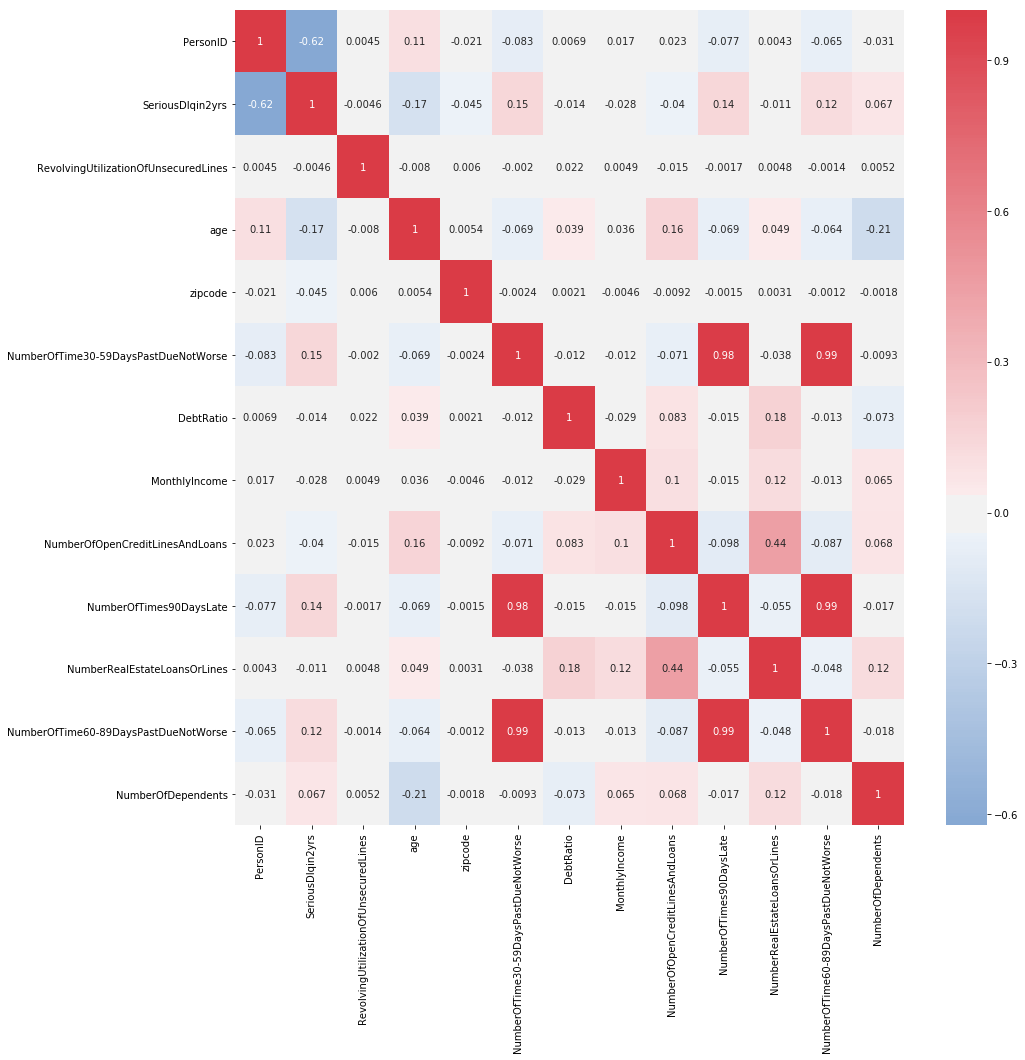

In [200]:
corr_heatmap(df, 15, 15)

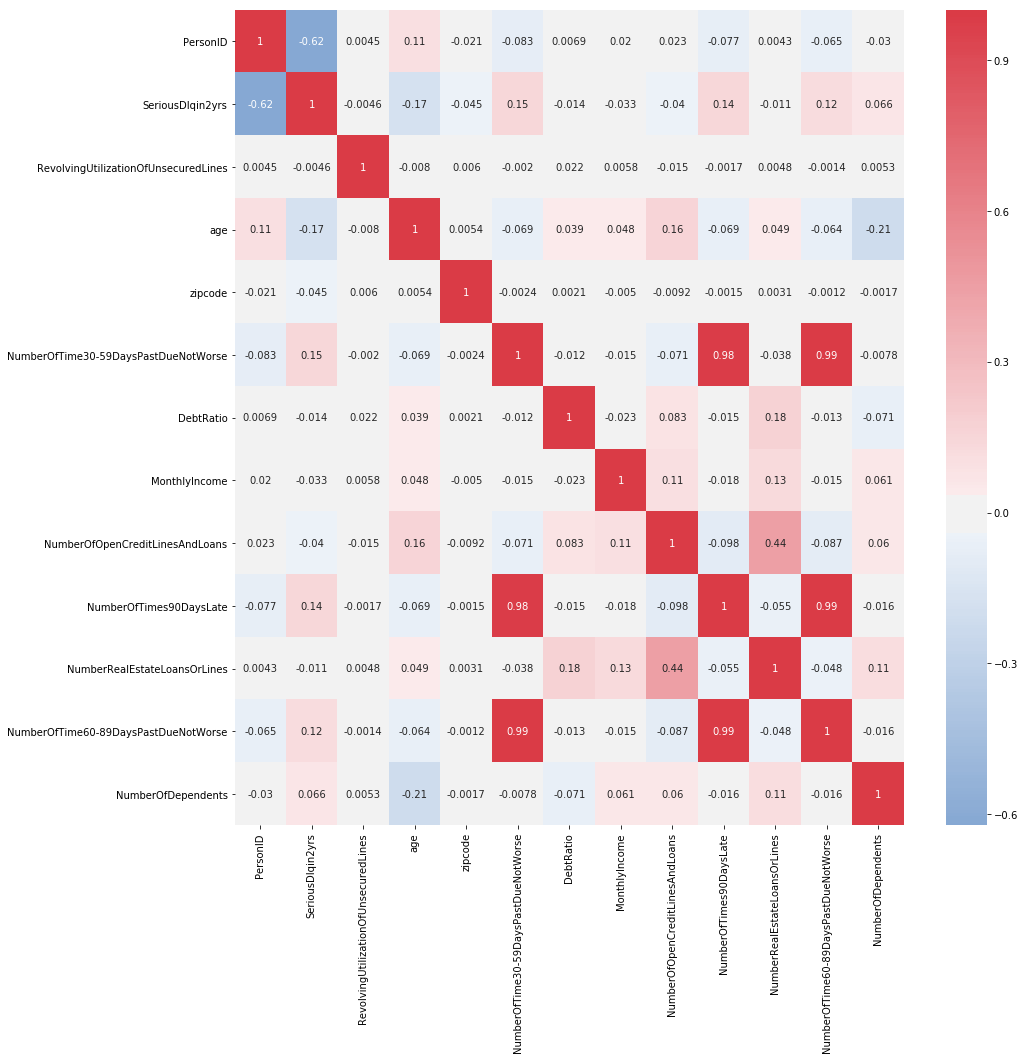

In [131]:
corr = df.corr()
png, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, center=0, cmap=sns.diverging_palette(250, 10, as_cmap=True), annot=True)

In [201]:
def make_box(df, width, height):
    rows = math.ceil(len(df.columns)/3)
    df.plot(kind='box', subplots=True, layout=(rows, 3), figsize=(width, height), 
            sharex=False, sharey=False)

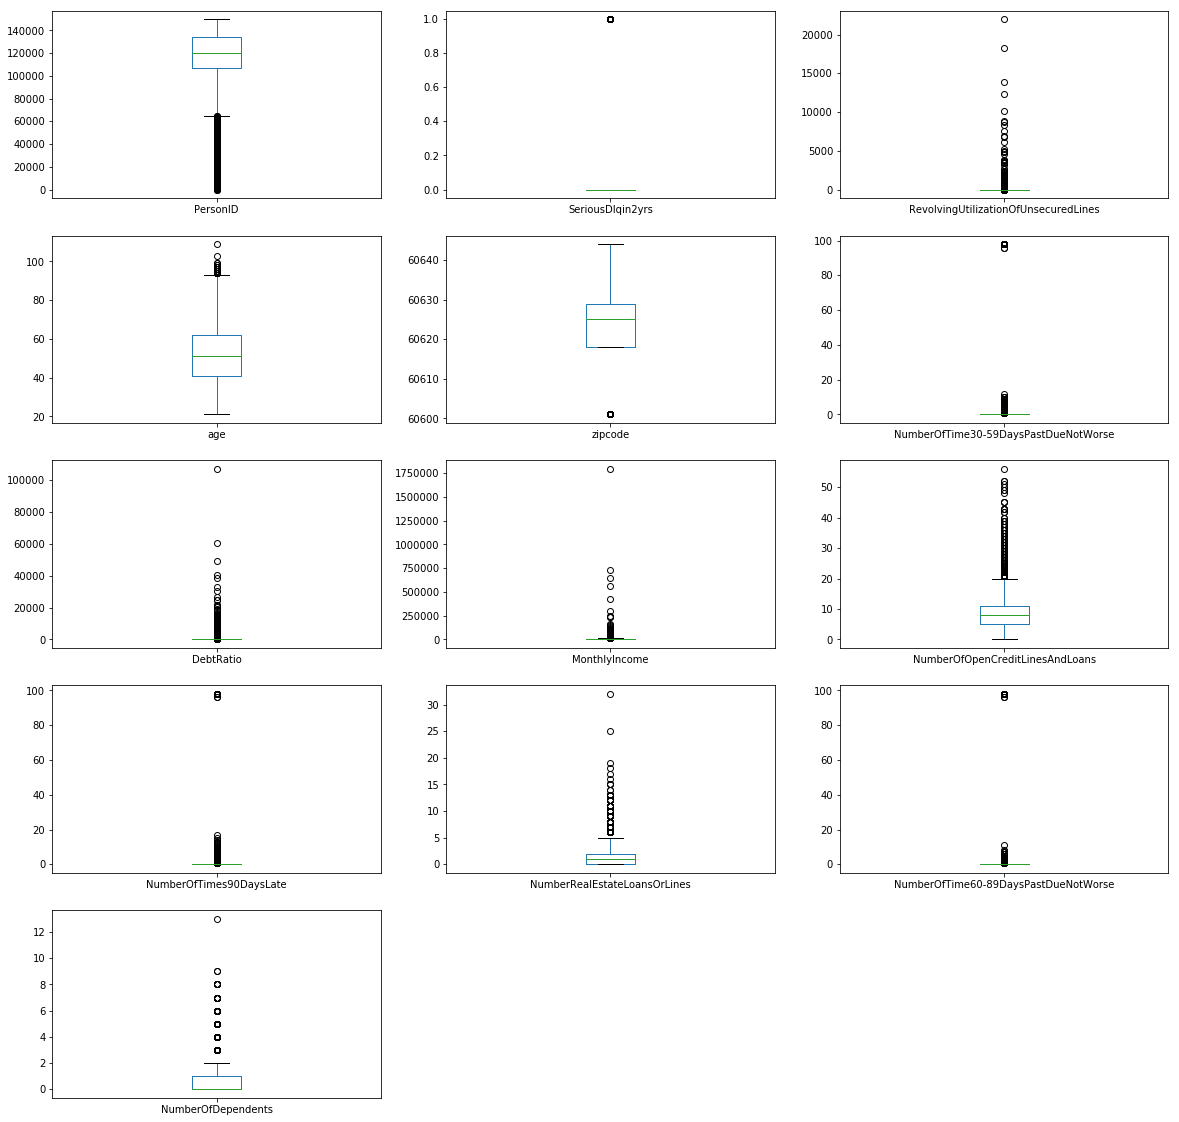

In [202]:
make_box(df, 20, 20)

PersonID                                   Axes(0.125,0.749828;0.227941x0.130172)
SeriousDlqin2yrs                        Axes(0.398529,0.749828;0.227941x0.130172)
RevolvingUtilizationOfUnsecuredLines    Axes(0.672059,0.749828;0.227941x0.130172)
age                                        Axes(0.125,0.593621;0.227941x0.130172)
zipcode                                 Axes(0.398529,0.593621;0.227941x0.130172)
NumberOfTime30-59DaysPastDueNotWorse    Axes(0.672059,0.593621;0.227941x0.130172)
DebtRatio                                  Axes(0.125,0.437414;0.227941x0.130172)
MonthlyIncome                           Axes(0.398529,0.437414;0.227941x0.130172)
NumberOfOpenCreditLinesAndLoans         Axes(0.672059,0.437414;0.227941x0.130172)
NumberOfTimes90DaysLate                    Axes(0.125,0.281207;0.227941x0.130172)
NumberRealEstateLoansOrLines            Axes(0.398529,0.281207;0.227941x0.130172)
NumberOfTime60-89DaysPastDueNotWorse    Axes(0.672059,0.281207;0.227941x0.130172)
NumberOfDependen

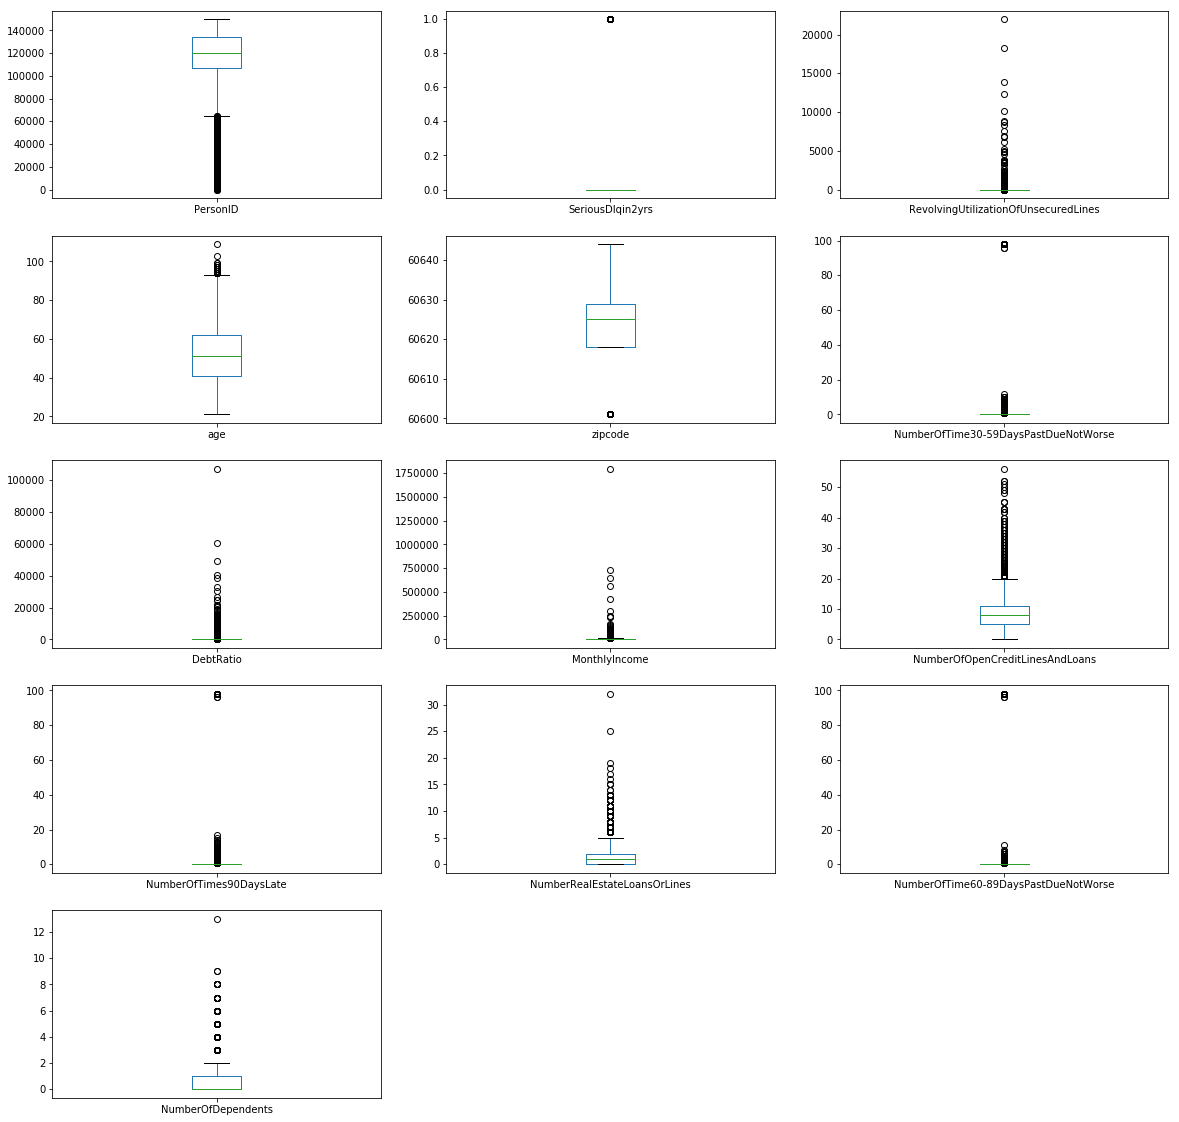

In [132]:
rows = math.ceil(len(df.columns)/3)
df.plot(kind='box', subplots=True, layout=(rows, 3), figsize=(20,20), sharex=False, sharey=False)

In [133]:
def make_percent_table(df, column):
    table = df.groupby(column).size().reset_index(name="count")
    table["percent"] = (table["count"]/len(df)) * 100
    return table

#table = make_percent_table(df, "some_cat")
#table.sort_values(by="percent", ascending=False)

In [97]:
# trends over time
# but no date variables in this dataset

In [205]:
def crosstab(df, dep, indep):
    return pd.crosstab(df[dep], df[indep], normalize='index')

In [206]:
crosstab(df, 'SeriousDlqin2yrs', 'NumberOfTime30-59DaysPastDueNotWorse')

NumberOfTime30-59DaysPastDueNotWorse,0,1,2,3,4,5,6,7,8,9,10,12,96,98
SeriousDlqin2yrs,,,,,,,,,,,,,,
0,0.864868,0.097221,0.024392,0.007646,0.003198,0.001221,0.000465,0.000204,0.000116,0.000087,0.000029,0.000000,0.000000,0.000552
1,0.503625,0.237009,0.124773,0.061631,0.030514,0.015861,0.007251,0.002870,0.000906,0.000604,0.000453,0.000151,0.000302,0.014048


In [166]:
# crosstabs
# dependent variable is SeriousDlqin2yrs, get crosstabs on:
# RevolvingUtilizationOfUnsecuredLines
# age
# NumberOfTime30-59DaysPastDueNotWorse
# DebtRatio
# MonthlyIncome
# NumberOfOpenCreditLinesAndLoans
# NumberOfTimes90DaysLate
# NumberRealEstateLoansOrLines
# NumberOfTime60-89DaysPastDueNotWorse
# NumberOfDependents

dep = df['SeriousDlqin2yrs']
pd.crosstab(dep, df['NumberOfTime30-59DaysPastDueNotWorse'], normalize='index')

NumberOfTime30-59DaysPastDueNotWorse,0,1,2,3,4,5,6,7,8,9,10,12,96,98
SeriousDlqin2yrs,,,,,,,,,,,,,,
0,0.864868,0.097221,0.024392,0.007646,0.003198,0.001221,0.000465,0.000204,0.000116,0.000087,0.000029,0.000000,0.000000,0.000552
1,0.503625,0.237009,0.124773,0.061631,0.030514,0.015861,0.007251,0.002870,0.000906,0.000604,0.000453,0.000151,0.000302,0.014048


In [167]:
pd.crosstab(dep, df['NumberOfOpenCreditLinesAndLoans'], normalize='index')

NumberOfOpenCreditLinesAndLoans,0,1,2,3,4,5,6,7,8,9,...,40,42,43,45,48,49,50,51,52,56
SeriousDlqin2yrs,,,,,,,,,,,,,,,,,,,,,
0,0.009972,0.027416,0.042854,0.061199,0.078439,0.085591,0.090737,0.089225,0.085242,0.077596,...,0.000029,0.000058,0.000116,0.000087,0.000000,0.000029,0.000029,0.000029,0.000029,0.000029
1,0.047583,0.057855,0.060423,0.065257,0.073414,0.081571,0.075831,0.074924,0.061631,0.065559,...,0.000151,0.000000,0.000000,0.000000,0.000151,0.000151,0.000000,0.000000,0.000151,0.000000


In [168]:
pd.crosstab(dep, df['NumberOfTimes90DaysLate'], normalize='index')

NumberOfTimes90DaysLate,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,96,98
SeriousDlqin2yrs,,,,,,,,,,,,,,,,,,,
0,0.967903,0.023259,0.004768,0.001861,0.000872,0.000233,0.000233,0.000058,0.000058,0.000087,0.000000,0.000029,0.000029,0.000029,0.000000,0.000029,0.000000,0.000000,0.000552
1,0.648640,0.177946,0.080211,0.040030,0.018127,0.008308,0.004985,0.003323,0.001360,0.001208,0.000604,0.000151,0.000151,0.000302,0.000151,0.000000,0.000151,0.000302,0.014048


In [169]:
pd.crosstab(dep, df['NumberRealEstateLoansOrLines'], normalize='index')

NumberRealEstateLoansOrLines,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,25,32
SeriousDlqin2yrs,,,,,,,,,,,,,,,,,,,,,
0,0.369607,0.356640,0.210577,0.039917,0.013752,0.004623,0.002093,0.001047,0.000436,0.000436,...,0.000145,0.000116,0.000058,0.000029,0.000029,0.000000,0.000029,0.000029,0.000000,0.000029
1,0.468429,0.271903,0.175227,0.043353,0.019637,0.008308,0.004381,0.002870,0.001360,0.001964,...,0.000604,0.000453,0.000000,0.000302,0.000000,0.000151,0.000000,0.000000,0.000151,0.000000


In [170]:
pd.crosstab(dep, df['NumberOfTime60-89DaysPastDueNotWorse'], normalize='index')

NumberOfTime60-89DaysPastDueNotWorse,0,1,2,3,4,5,6,7,8,11,96,98
SeriousDlqin2yrs,,,,,,,,,,,,
0,0.965606,0.028928,0.003402,0.001076,0.000262,0.000087,0.000029,0.000058,0.000000,0.000000,0.000000,0.000552
1,0.721299,0.175831,0.058006,0.019033,0.007553,0.002115,0.001057,0.000453,0.000151,0.000151,0.000302,0.014048


In [171]:
pd.crosstab(dep, df['NumberOfDependents'], normalize='index')

NumberOfDependents,0.0,0.773230946247,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,13.0
SeriousDlqin2yrs,,,,,,,,,,,,
0,0.584923,0.026631,0.173218,0.130015,0.061897,0.017124,0.004623,0.000988,0.000291,0.000204,0.000058,0.000029
1,0.511178,0.018278,0.189275,0.161178,0.081118,0.029758,0.006344,0.002568,0.000302,0.000000,0.000000,0.000000


## Pre-Process Data

In [176]:
df[df['NumberOfDependents'].isnull()]

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
45,99457,0,0.017736,48,60601,0,489.0,NaN,5,0,0,0,NaN
65,99646,0,0.004329,69,60601,0,1525.0,NaN,8,0,1,0,NaN
90,99951,0,1.000000,80,60601,0,0.0,NaN,4,0,0,0,NaN
97,99987,0,0.000000,64,60601,0,200.0,NaN,3,0,1,0,NaN
150,100529,0,1.000000,21,60601,0,0.0,NaN,1,0,0,0,NaN
193,100953,0,0.014507,91,60601,0,7.0,NaN,1,0,0,0,NaN
210,101132,0,0.070671,57,60601,0,1867.0,NaN,8,0,1,0,NaN
263,101763,0,0.007194,22,60601,0,0.0,NaN,1,0,0,0,NaN
273,101848,0,0.001939,81,60601,0,12.0,NaN,3,0,0,0,NaN
280,101934,0,0.009804,52,60601,0,6.0,NaN,2,0,0,0,NaN


In [177]:
def impute_mean(df):
    #df = df.apply(lambda x: x.fillna(x.mean()),axis=0)
    return df.fillna(df.median())

In [119]:
df['NumberOfDependents'].fillna((df['NumberOfDependents'].median()), inplace=True)

In [121]:
df[df['PersonID'] == 100953]

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
193,100953,0,0.014507,91,60601,0,7.0,NaN,1,0,0,0,0.0


In [178]:
df = impute_mean(df)
df.isnull().sum()

PersonID                                0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
zipcode                                 0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [179]:
df[df['PersonID'] == 99457]

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
45,99457,0,0.017736,48,60601,0,489.0,5250.0,5,0,0,0,0.0


## Generate Features

In [138]:
def discretize(df, colname, bins=5, labels=False):
    new_colname = colname + "_discrete"
    df[new_colname], bins = pd.cut(df[colname], bins=bins, labels=labels, include_lowest=True, retbins=True)
    return df, bins

In [139]:
new_df, bins = discretize(df, "age")
bins

array([  20.912,   38.6  ,   56.2  ,   73.8  ,   91.4  ,  109.   ])

In [140]:
new_df[["age", "age_discrete"]].head(n=50)

,age,age_discrete
0,55,1
1,71,2
2,51,1
3,55,1
4,45,1
5,57,2
6,48,1
7,34,0
8,30,0
9,71,2


In [156]:
# df_with_dummies = pd.get_dummies(df, prefix='Category_', columns=['Category'])

def make_dummies(df, colname):
    dummy = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, dummy], axis = 1)
    return df

In [157]:
df["zipcode"] = df["zipcode"].astype('category')
df.dtypes
df["zipcode"].unique()

[60601, 60618, 60625, 60629, 60637, 60644]
Categories (6, int64): [60601, 60618, 60625, 60629, 60637, 60644]

In [158]:
newer_df = make_dummies(df, "zipcode")
newer_df.tail(n=50)

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_discrete,zipcode_60618,zipcode_60625,zipcode_60629,zipcode_60637,zipcode_60644
40966,123244,0,0.108956,60,60644,0,0.469555,3300.000000,7,0,1,0,0.0,2,0,0,0,0,1
40967,123247,0,1.000000,56,60644,0,0.085699,7397.000000,3,0,1,0,0.0,1,0,0,0,0,1
40968,123252,0,0.011217,37,60644,0,0.291674,5800.000000,4,0,1,0,0.0,0,0,0,0,0,1
40969,123258,0,0.229676,47,60644,3,4645.000000,6578.995733,20,0,3,0,2.0,1,0,0,0,0,1
40970,123264,0,0.054102,71,60644,0,0.265173,10000.000000,6,0,3,0,1.0,2,0,0,0,0,1
40971,123284,0,0.086294,62,60644,0,0.218689,6163.000000,10,0,2,0,0.0,2,0,0,0,0,1
40972,123310,0,0.739478,50,60644,0,640.000000,6578.995733,8,0,0,0,0.0,1,0,0,0,0,1
40973,123311,0,0.000000,24,60644,0,0.000000,864.000000,1,0,0,0,0.0,0,0,0,0,0,1
40974,123346,0,0.000000,72,60644,0,5.000000,6578.995733,3,0,0,0,0.0,2,0,0,0,0,1
40975,123354,0,0.994429,63,60644,4,0.254854,8137.000000,6,6,1,1,0.0,2,0,0,0,0,1


## Build Classifier

In [207]:
 def build_log(df, yvar, xvars):
    y = df[yvar]
    x = df[xvars]
    logreg = LogisticRegression()
    logreg.fit(x,y)
    y_pred = logreg.predict(x)
    return y, y_pred

In [209]:
y, y_pred = build_log(df, 'SeriousDlqin2yrs', ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
     'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 
     'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'])

In [144]:
y = df['SeriousDlqin2yrs']
features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
     'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 
     'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
x = df[features]

In [145]:
logreg = LogisticRegression()

In [147]:
x.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41016 entries, 0 to 41015
Data columns (total 10 columns):
RevolvingUtilizationOfUnsecuredLines    41016 non-null float64
age                                     41016 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    41016 non-null int64
DebtRatio                               41016 non-null float64
MonthlyIncome                           41016 non-null float64
NumberOfOpenCreditLinesAndLoans         41016 non-null int64
NumberOfTimes90DaysLate                 41016 non-null int64
NumberRealEstateLoansOrLines            41016 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    41016 non-null int64
NumberOfDependents                      41016 non-null float64
dtypes: float64(4), int64(6)
memory usage: 3.1 MB


In [149]:
logreg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [150]:
y_pred=logreg.predict(x)

## Evaluate Classifier

In [218]:
def conf_matrix(y, y_pred, figsize=(10, 7)):
    cnf_matrix = metrics.confusion_matrix(y, y_pred)
    class_names = ['Negative', 'Positive']
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

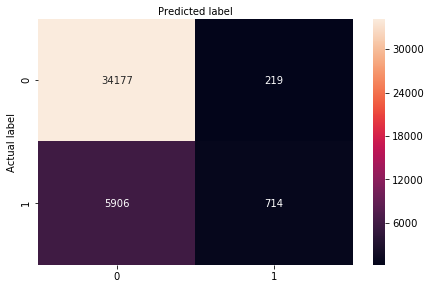

In [219]:
conf_matrix(y, y_pred)

In [210]:
cnf_matrix = metrics.confusion_matrix(y, y_pred)

In [211]:
cnf_matrix

array([[34177,   219],
       [ 5906,   714]])

In [220]:
def get_accuracy(y, y_pred):
    return metrics.accuracy_score(y, y_pred)

In [221]:
get_accuracy(y, y_pred)

0.85066803198751706

In [212]:
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 0.850668031988


In [213]:
print(metrics.classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.99      0.92     34396
          1       0.77      0.11      0.19      6620

avg / total       0.84      0.85      0.80     41016

